Analisi Dati di Gruppo

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('train.csv')

print("\nInformazioni Data Frame Car\n\n")

display(df.info())


Informazioni Data Frame Car


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


None

In [27]:
print("\nStampa elementi unici per colonna:\n\n")

print("Ci sono",len(set(df["brand"])),"brand diversi.")
print("Ci sono",len(set(df["model_year"])), "anni diversi.")
print("Ci sono",len(set(df["model"])),"modelli diversi.")
print("Ci sono",len(set(df["fuel_type"])), "fuel_type diversi.")
print("Ci sono",len(set(df["engine"])),"engine diversi.")
print("Ci sono",len(set(df["transmission"])), "trasmissioni diverse.")
print("Ci sono",len(set(df["ext_col"])),"ext_col diversi.")
print("Ci sono",len(set(df["int_col"])), "int_col diversi.")
print("Ci sono",len(set(df["accident"])), "accident diversi.")
print("Ci sono",len(set(df["clean_title"])),"clean_title diversi.")
print("Ci sono",len(set(df["price"])), "price diversi.")




Stampa elementi unici per colonna:


Ci sono 57 brand diversi.
Ci sono 34 anni diversi.
Ci sono 1897 modelli diversi.
Ci sono 8 fuel_type diversi.
Ci sono 1117 engine diversi.
Ci sono 52 trasmissioni diverse.
Ci sono 319 ext_col diversi.
Ci sono 156 int_col diversi.
Ci sono 3 accident diversi.
Ci sono 2 clean_title diversi.
Ci sono 1569 price diversi.


In [28]:
#Rendiamo numerica la colonna Accident
df['accident'] = df['accident'].fillna(-1)
df["accident"].replace("None reported", 0, inplace = True)
df["accident"].replace("At least 1 accident or damage reported", 1, inplace = True)


#Rendiamo numerica la colonna clean_title

df['clean_title'] = df['clean_title'].fillna(0)
df["clean_title"].replace("Yes", 1, inplace = True)

#Pulizia colonna fuel_type

df['fuel_type'] = df['fuel_type'].fillna(-1)



C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\585391148.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["accident"].replace("None reported", 0, inplace = True)
C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\585391148.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [29]:
model_price_mean = df.groupby('model_year')['price'].mean()
print("Media del prezzo per anno modello:\n", model_price_mean)


Media del prezzo per anno modello:
 model_year
1974    74124.083333
1992    26957.000000
1993    38091.871429
1994    50181.760870
1995    38205.872549
1996    17370.894180
1997    14586.419872
1998    13442.169096
1999    10702.705776
2000    13796.912186
2001    19227.459583
2002    21286.650546
2003    17021.920252
2004    19401.310506
2005    26376.852029
2006    18351.585288
2007    19449.327112
2008    20384.406711
2009    21522.417894
2010    19964.660449
2011    18084.812450
2012    19806.953897
2013    23437.342702
2014    24758.274866
2015    30974.878567
2016    33531.819655
2017    37943.234329
2018    47707.568722
2019    49375.295606
2020    61556.784074
2021    65893.857951
2022    72732.327005
2023    95707.912305
2024    78006.067901
Name: price, dtype: float64


In [30]:
df[df["price"]> 1000000]["price"].unique()

array([2954083, 1950995, 1599000])

In [31]:
def custom_range(start, stop):
    current = start
    while current < stop:
        if 2000 <= current < 10000:
            step = 2000
        elif 10000 <= current < 1000000:
            step = 20000
        elif 1000000 <= current <= 2954083:
            step = 1000000
        else:
            break  # Se fuori dai range specificati
        yield current
        current += step

df['PriceGroup'] = pd.cut(df['price'], bins= custom_range(2000,2954083), right= False)

price_group =  df.groupby('PriceGroup').agg(
    media_anno=('model_year', 'mean'),
    count_anni = ('model_year', 'count'),
    count_id =  ('id', 'count')
)

display(price_group)

C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\1537887921.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group =  df.groupby('PriceGroup').agg(


,media_anno,count_anni,count_id
PriceGroup,,,
"[2000, 4000)",2006.582960,1561,1561
"[4000, 6000)",2006.799640,4447,4447
"[6000, 8000)",2007.664756,6804,6804
"[8000, 10000)",2008.260092,7382,7382
"[10000, 30000)",2013.760477,71922,71922
"[30000, 50000)",2018.550494,50471,50471
"[50000, 70000)",2019.438768,22080,22080
"[70000, 90000)",2020.062512,10046,10046
"[90000, 110000)",2020.270908,4747,4747


C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\3905736440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop('brand', axis=1, inplace=True)
C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\3905736440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brand.drop('brand', axis=1, inplace=True)
C:\Users\ROBERTA\AppData\Local\Temp\ipykernel_10924\3905736440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

[('Brand name: MINI\n',
  model_year  milage       -0.458579
              price         0.534950
  milage      model_year   -0.458579
              price        -0.521113
  price       model_year    0.534950
              milage       -0.521113
  dtype: float64),
 ('Brand name: Lincoln\n',
  model_year  milage       -0.698952
              price         0.429888
  milage      model_year   -0.698952
              price        -0.460630
  price       model_year    0.429888
              milage       -0.460630
  dtype: float64),
 ('Brand name: Chevrolet\n',
  model_year  milage       -0.630045
  milage      model_year   -0.630045
              accident      0.326432
  accident    milage        0.326432
  dtype: float64),
 ('Brand name: Genesis\n',
  model_year  milage       -0.675972
  milage      model_year   -0.675972
  dtype: float64),
 ('Brand name: Mercedes-Benz\n',
  model_year   milage        -0.655536
               clean_title   -0.308800
  milage       model_year    -0.655536
 

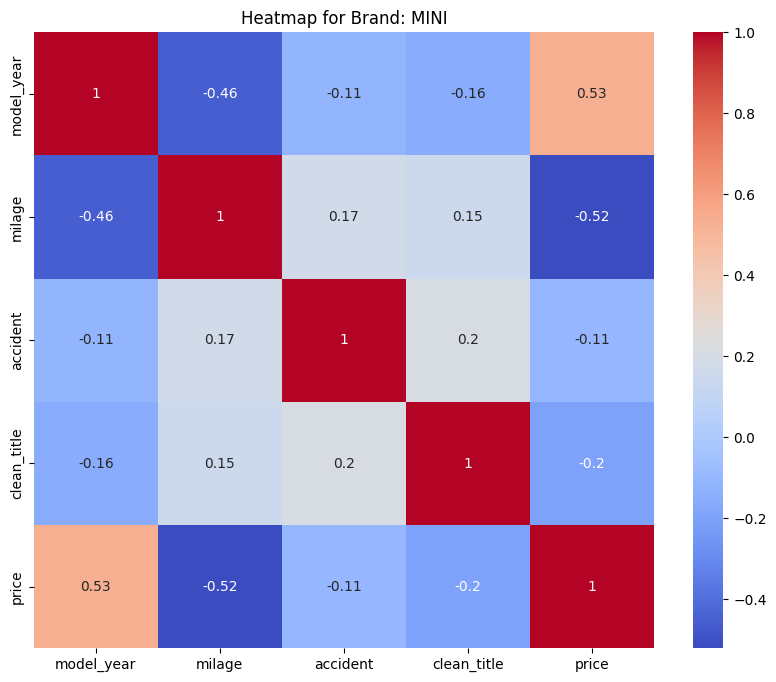

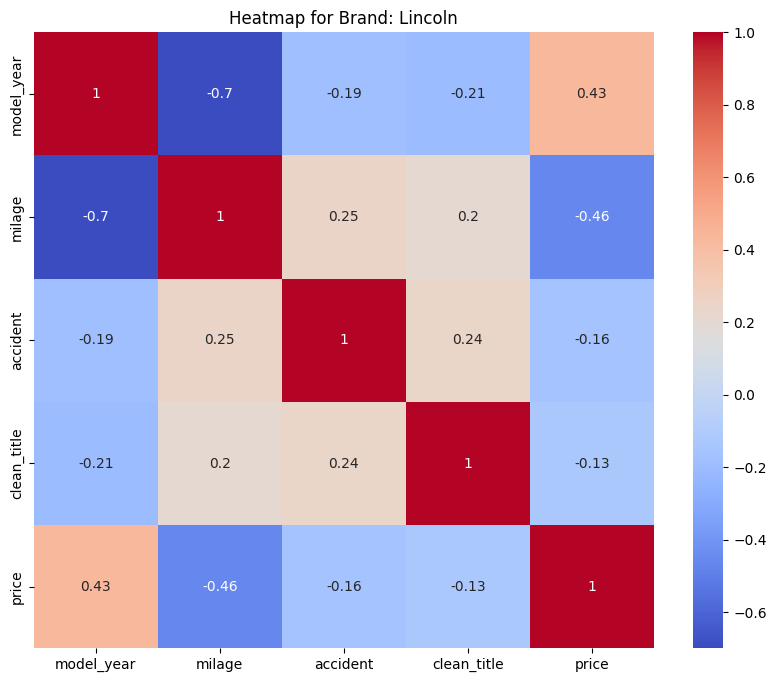

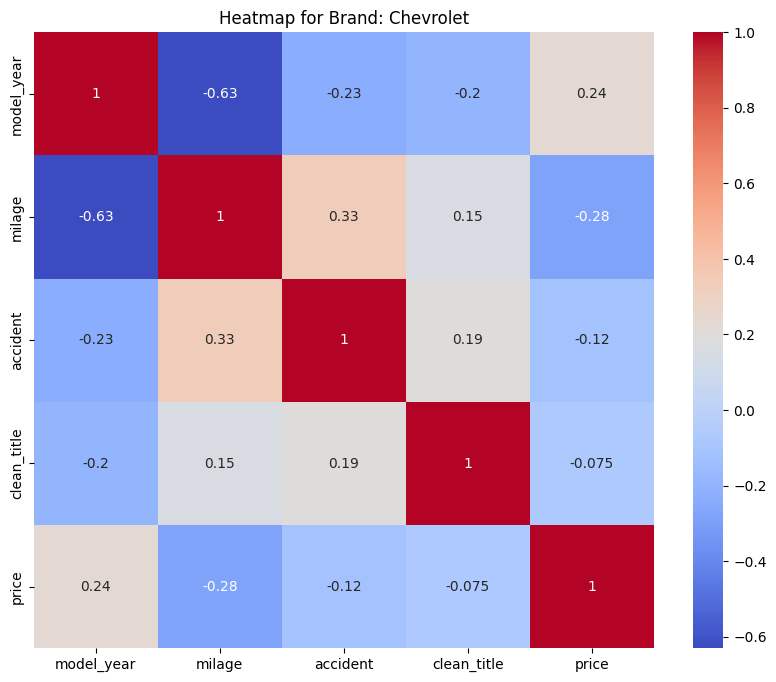

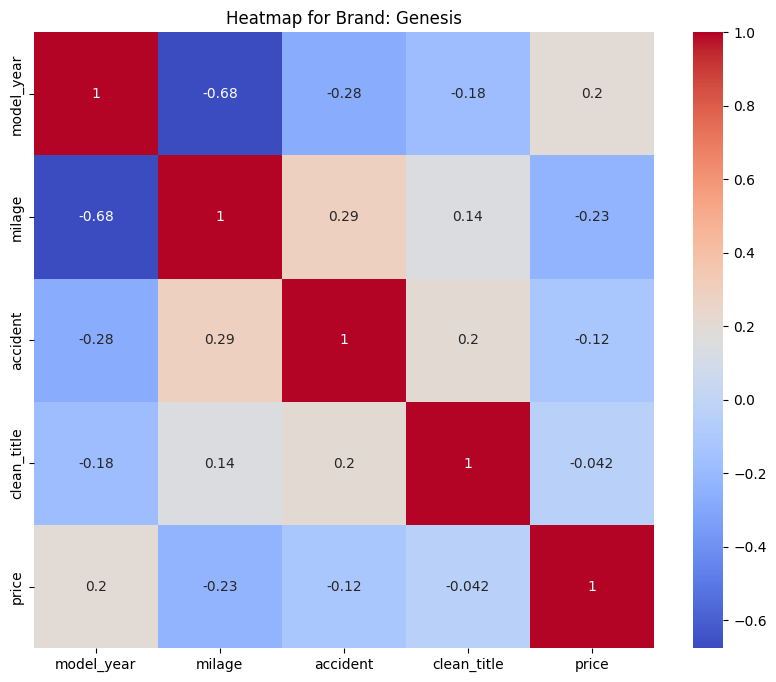

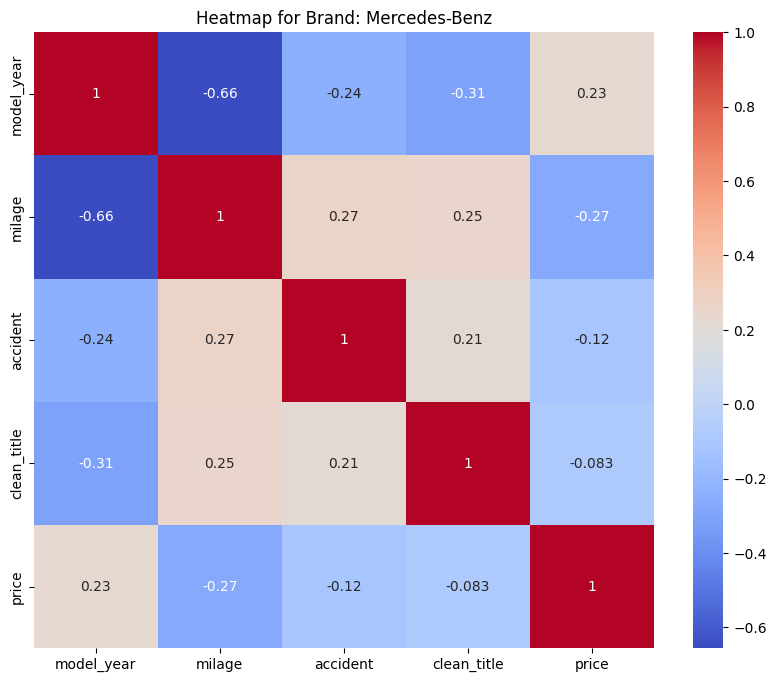

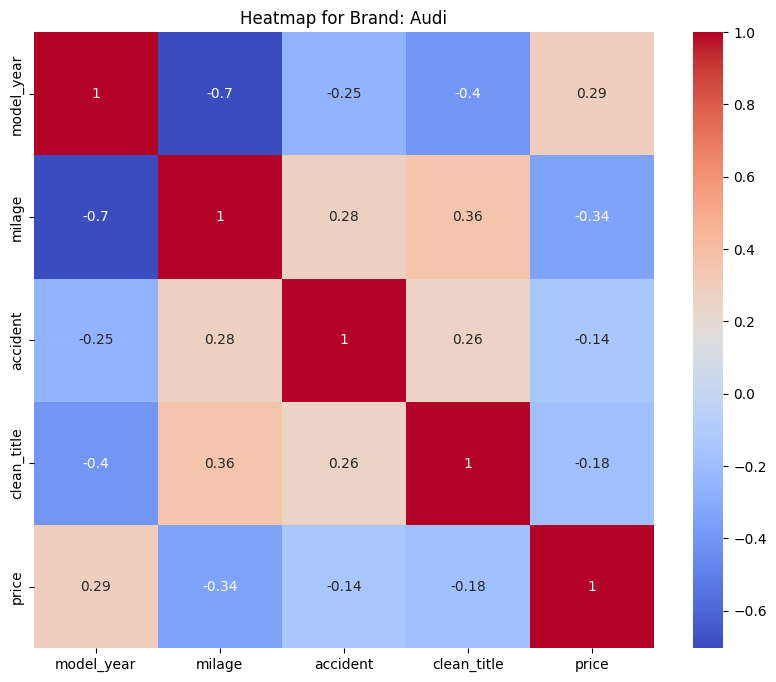

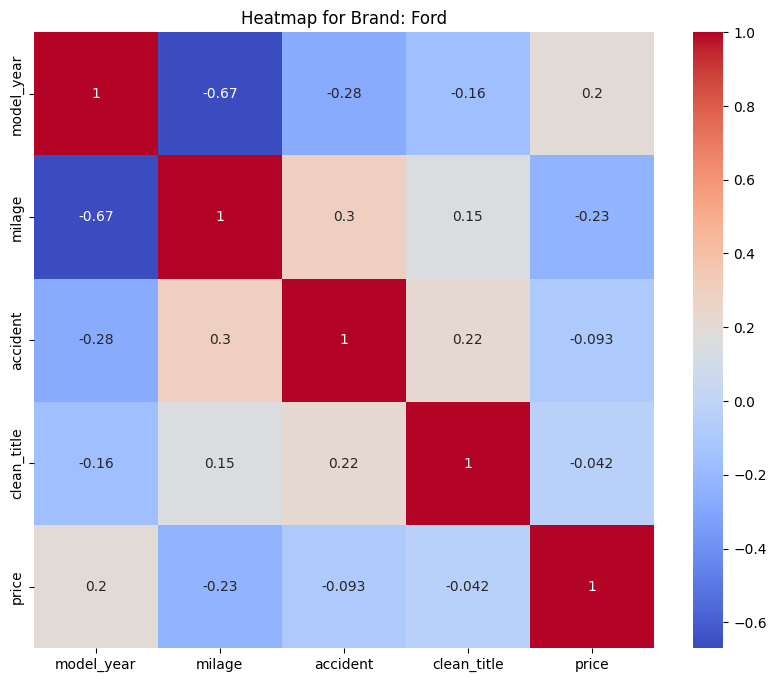

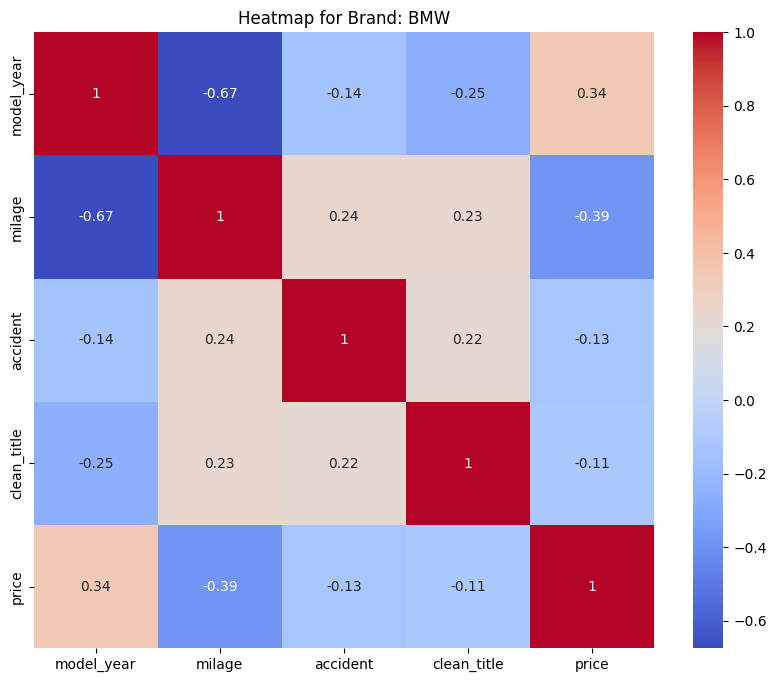

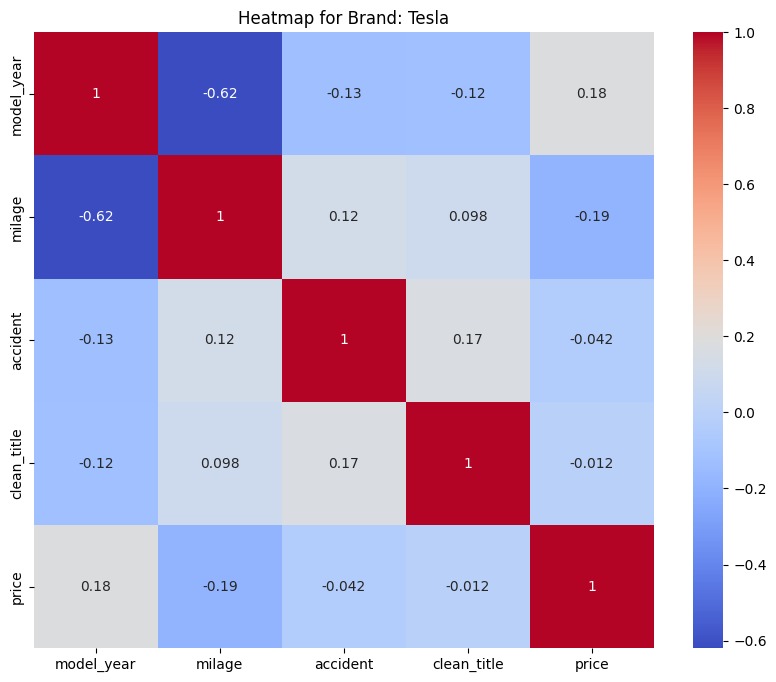

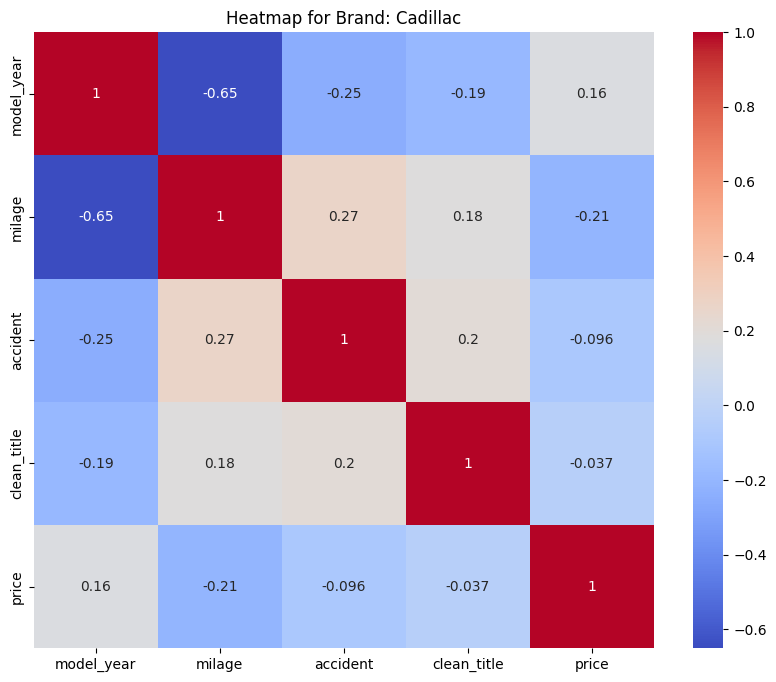

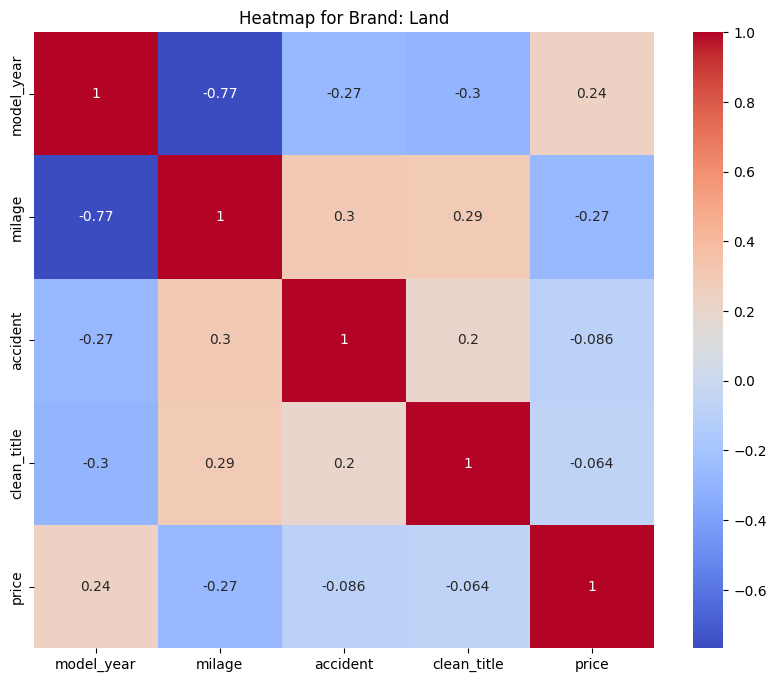

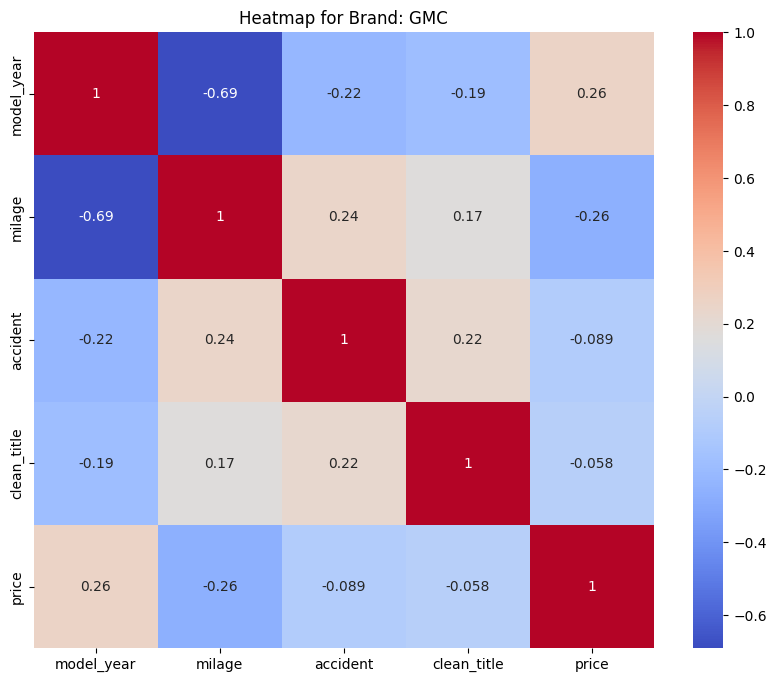

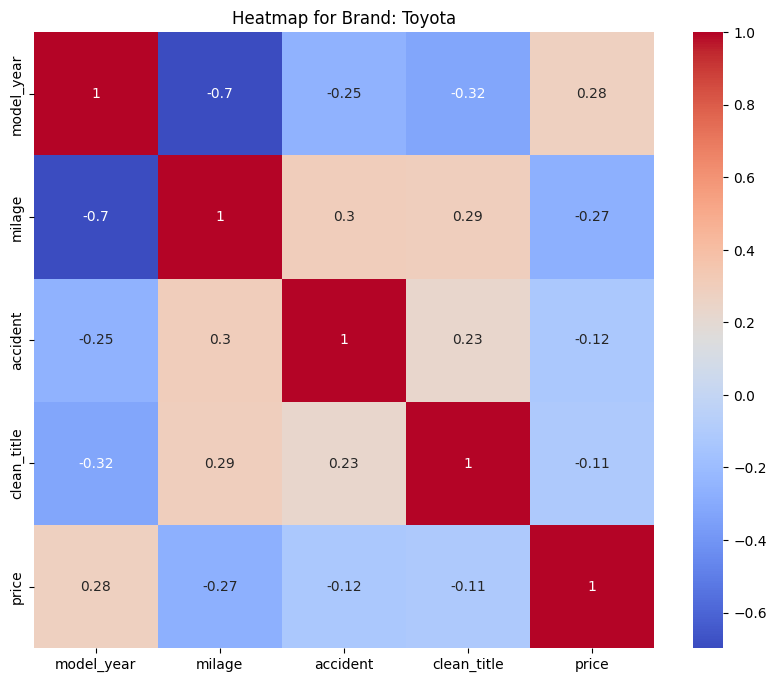

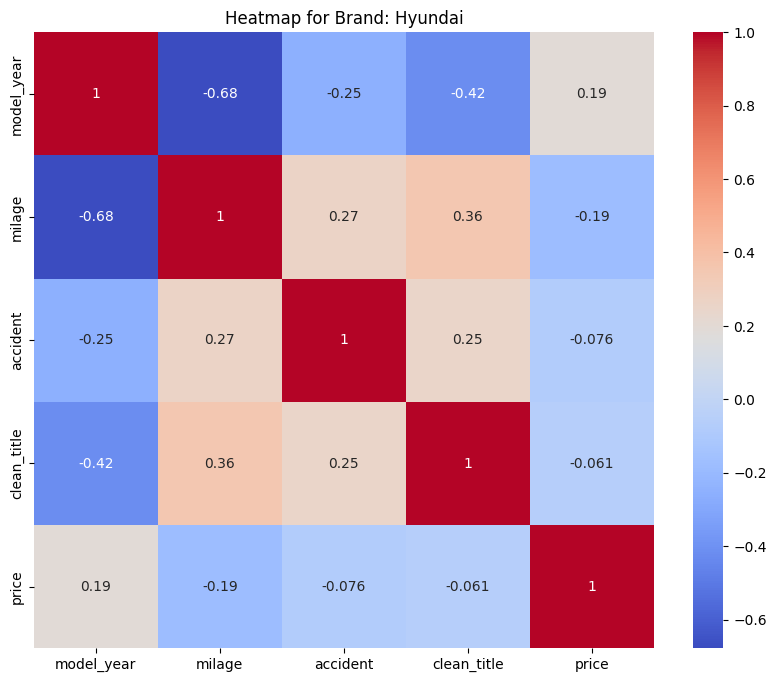

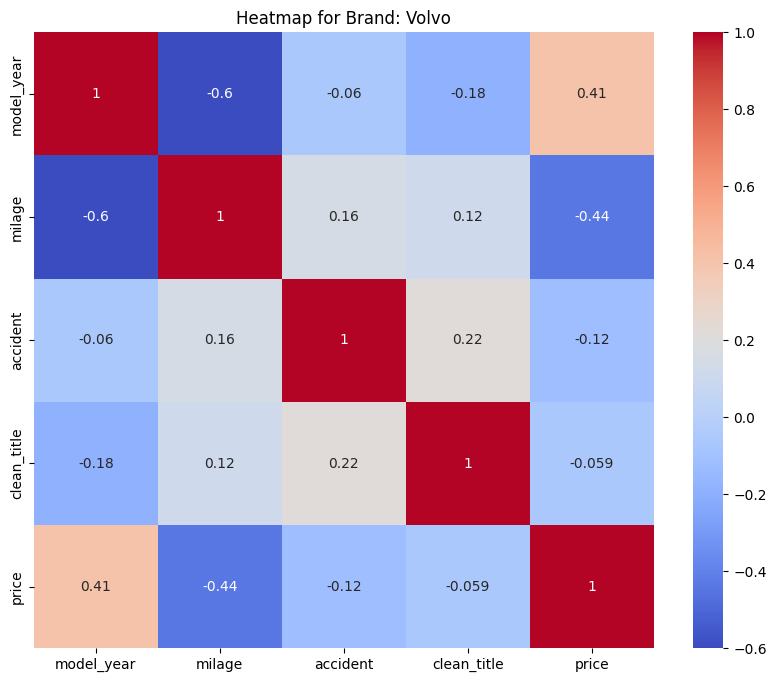

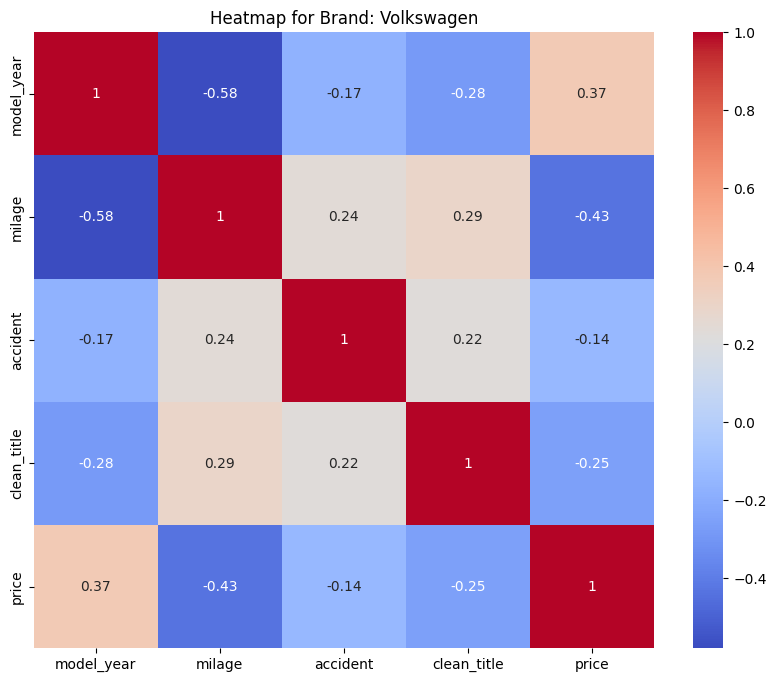

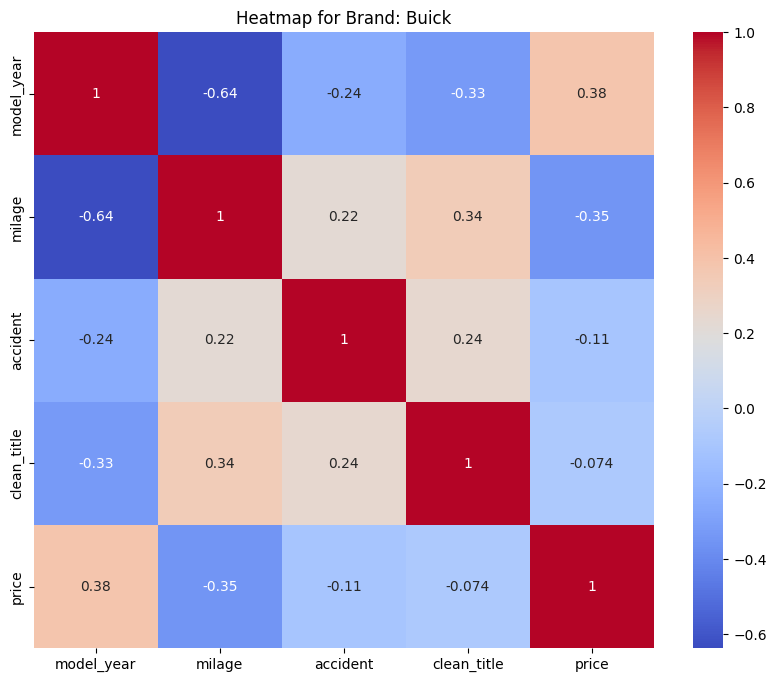

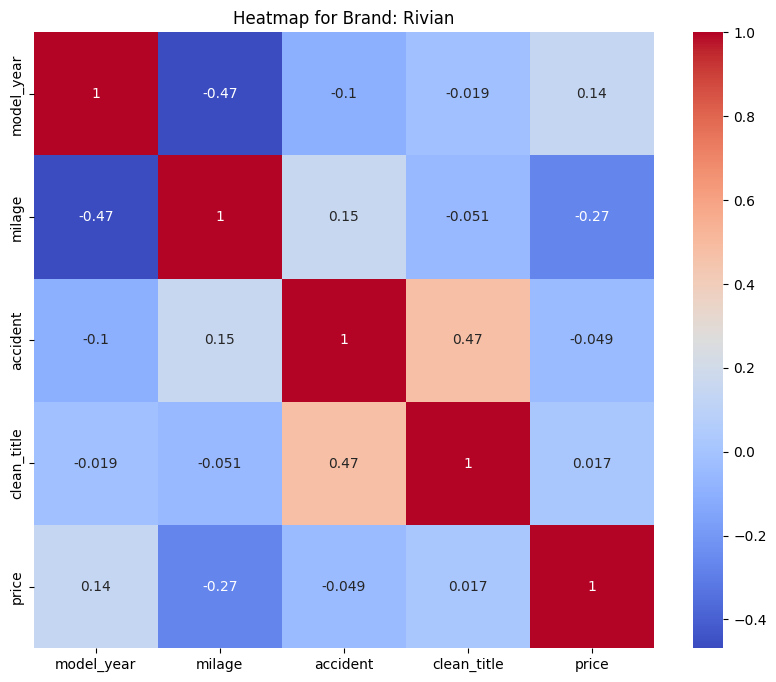

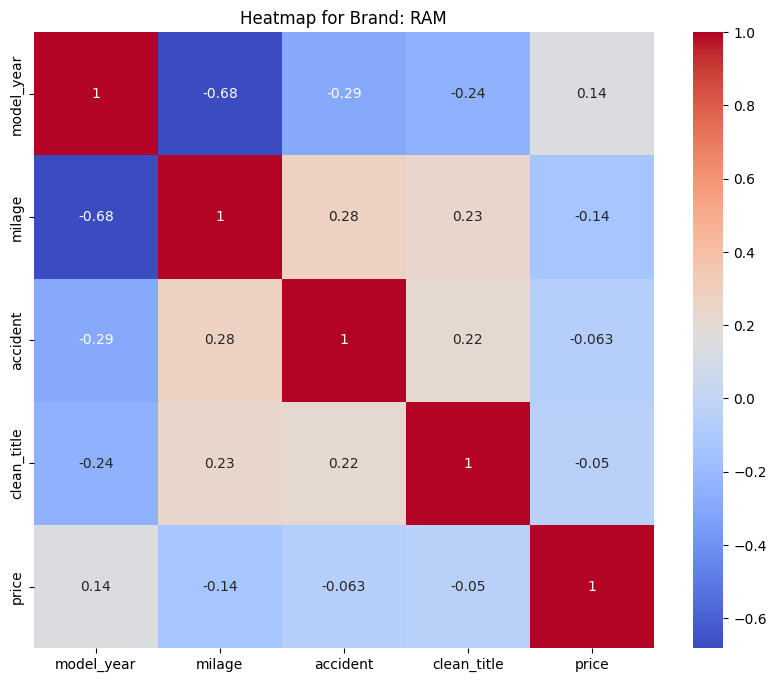

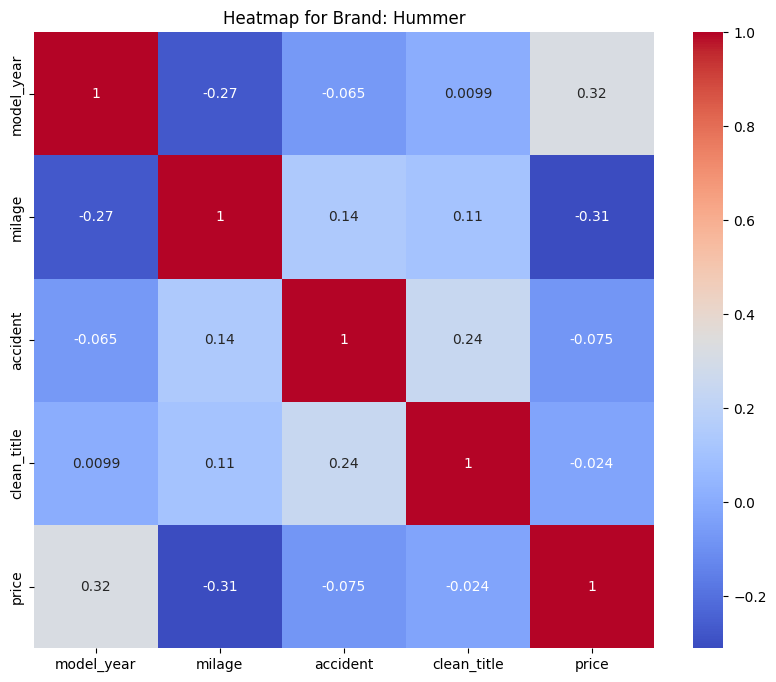

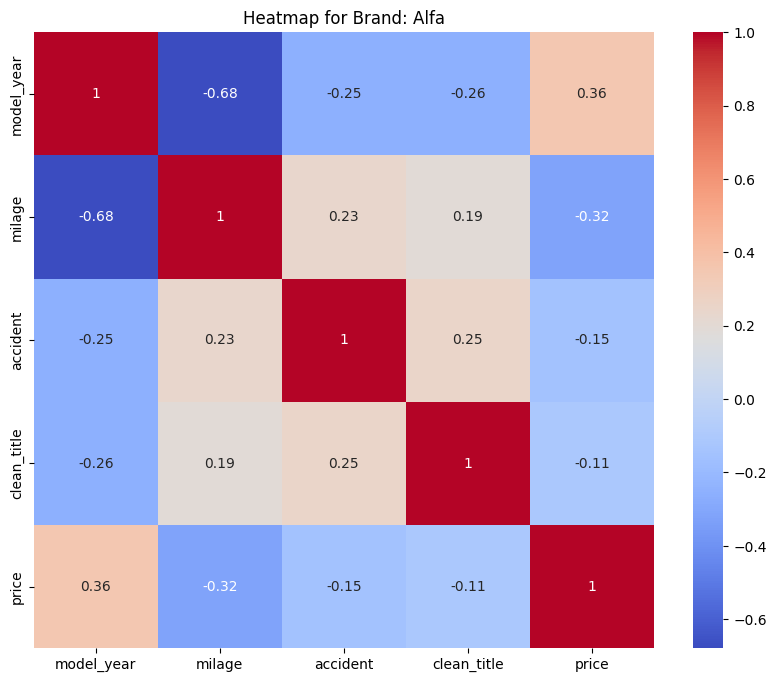

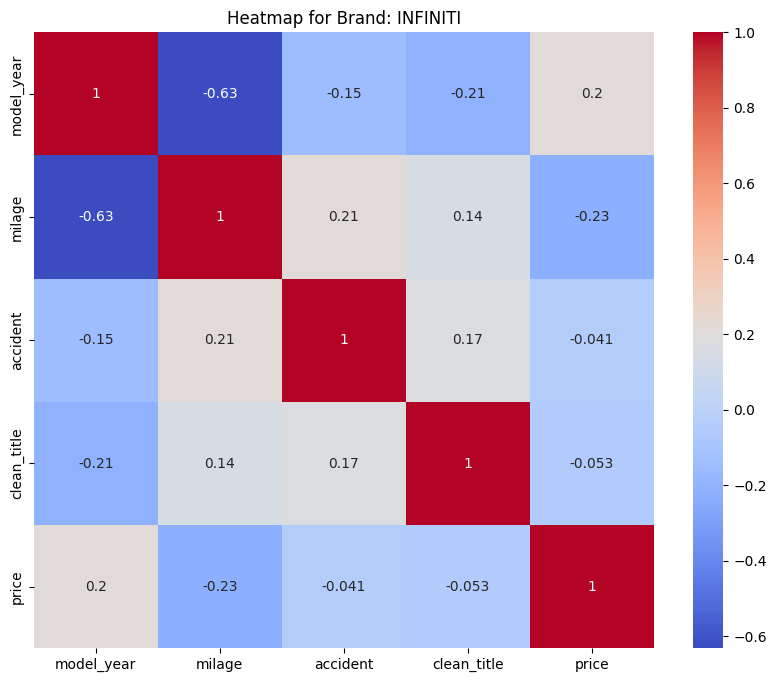

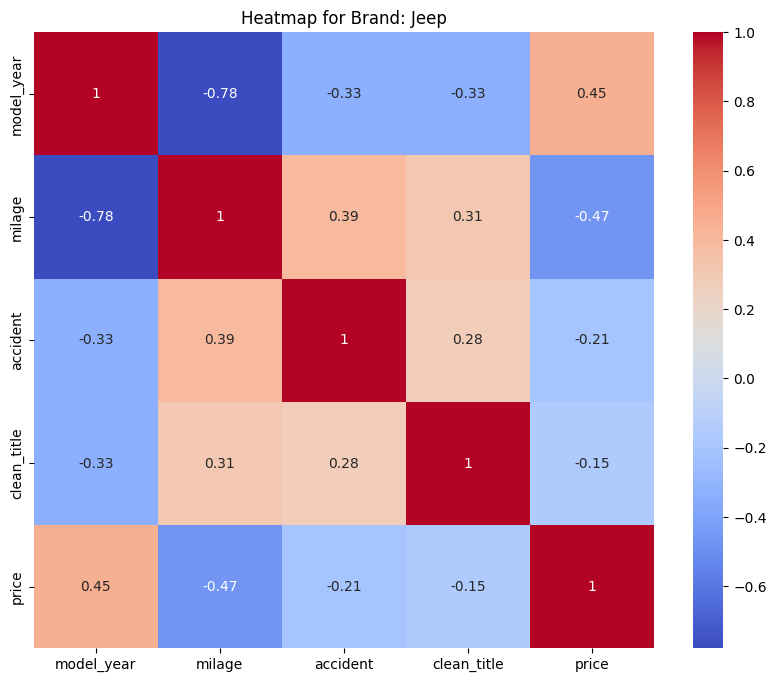

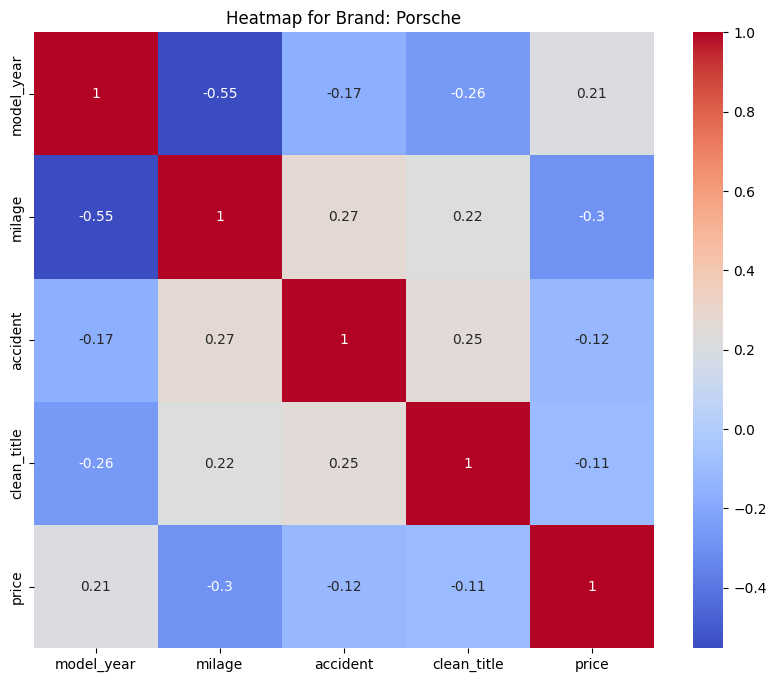

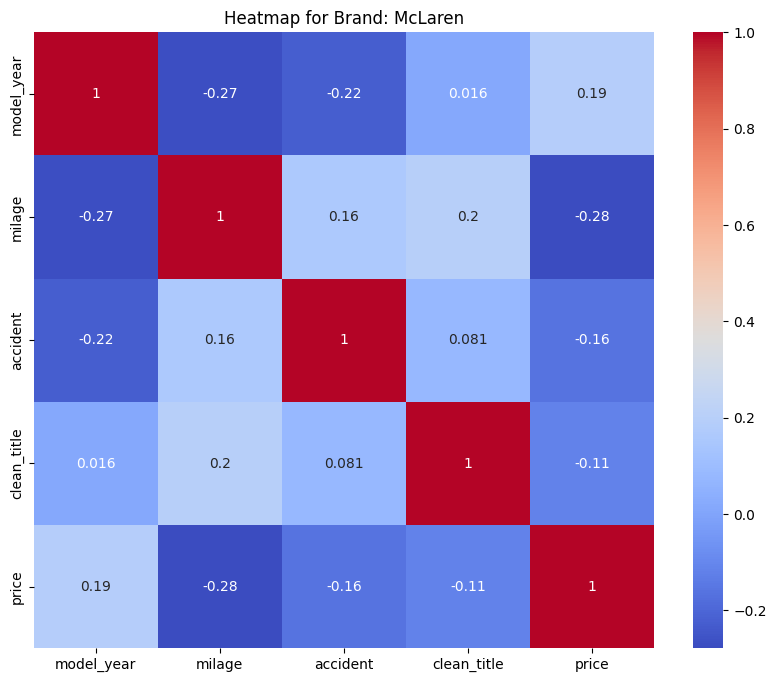

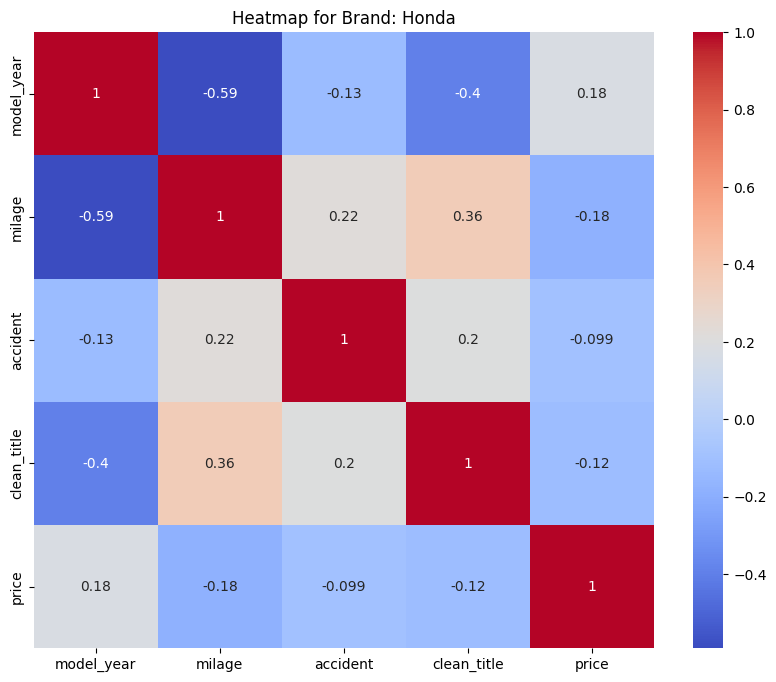

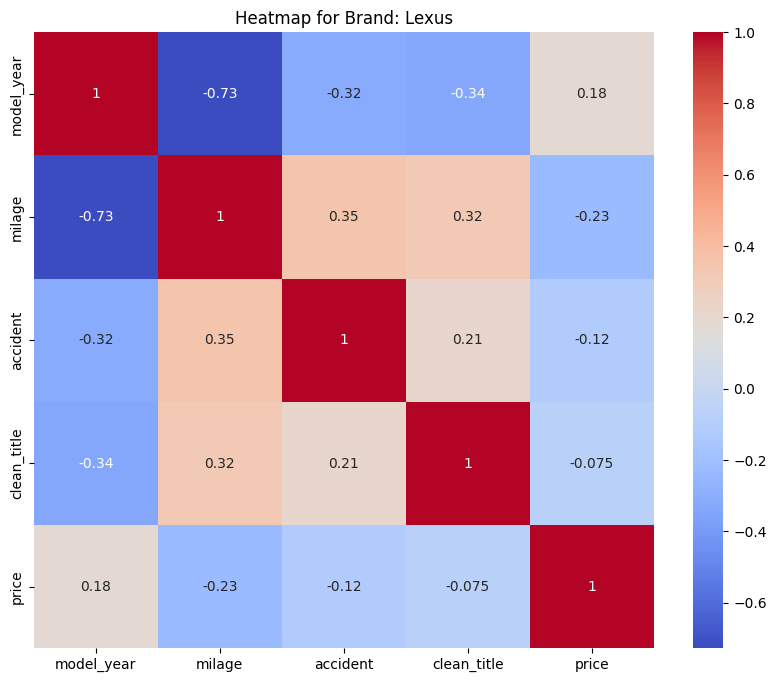

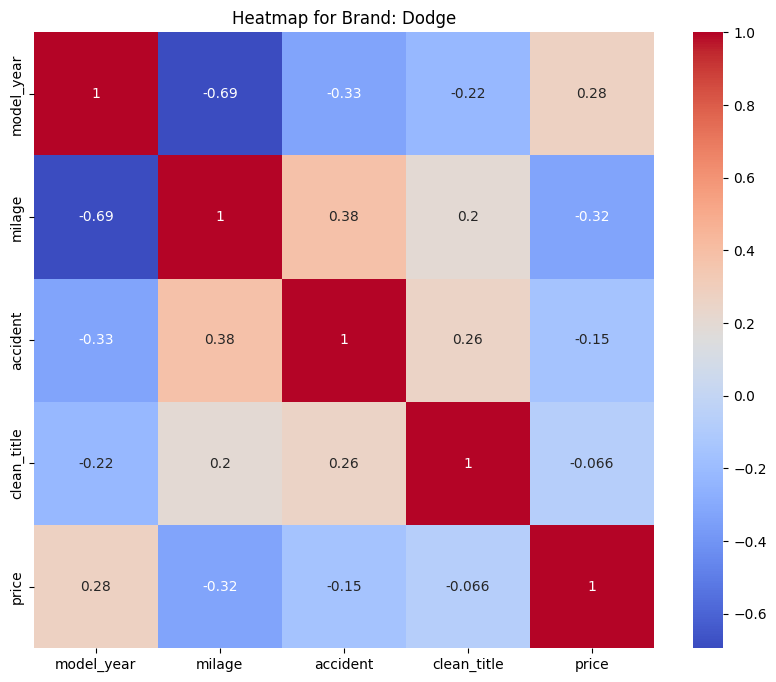

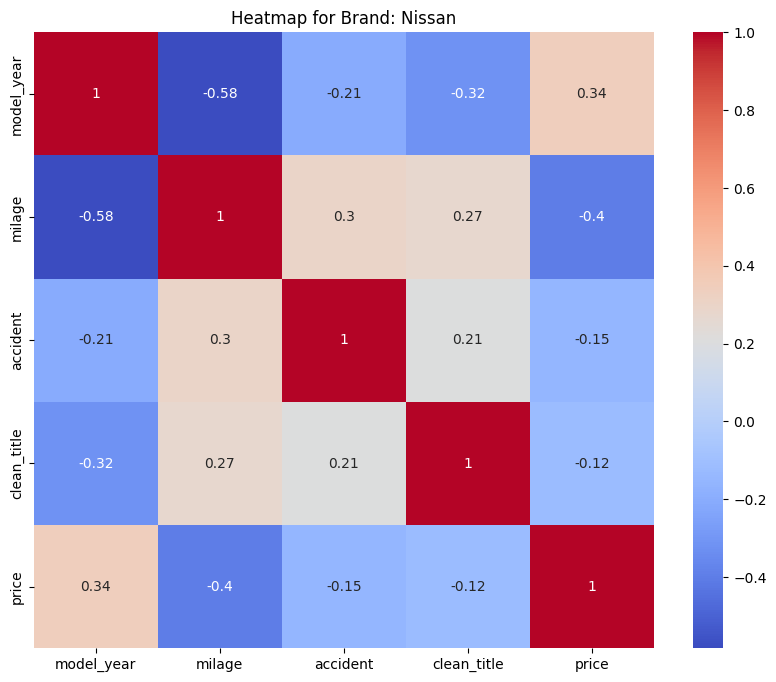

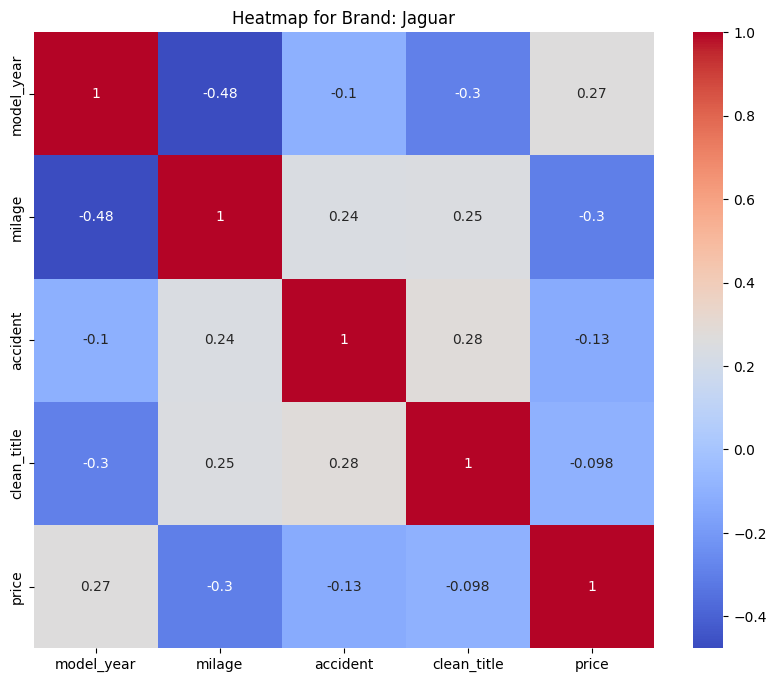

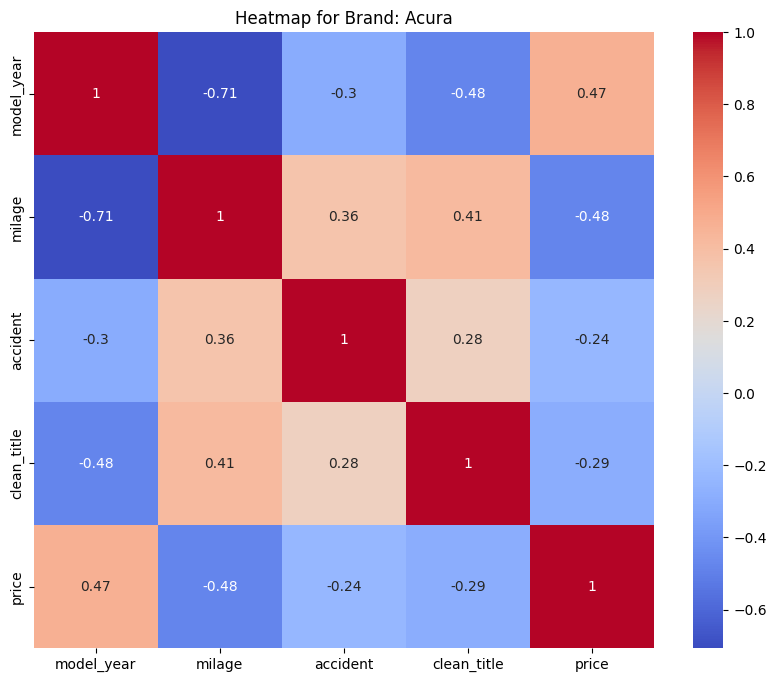

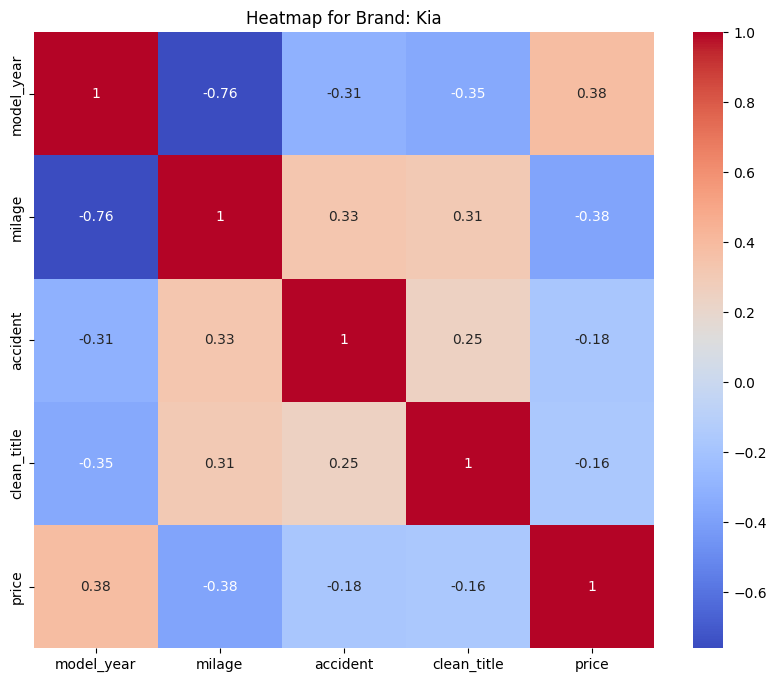

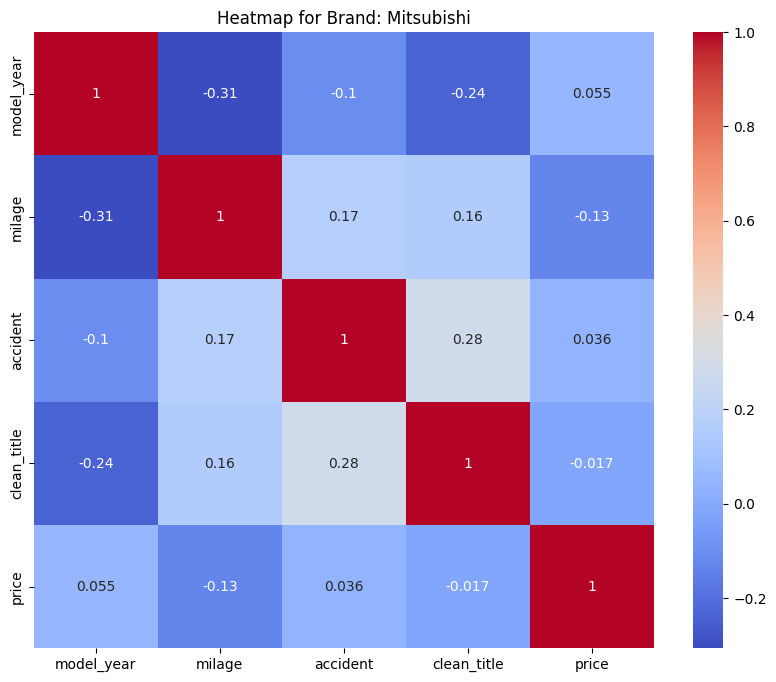

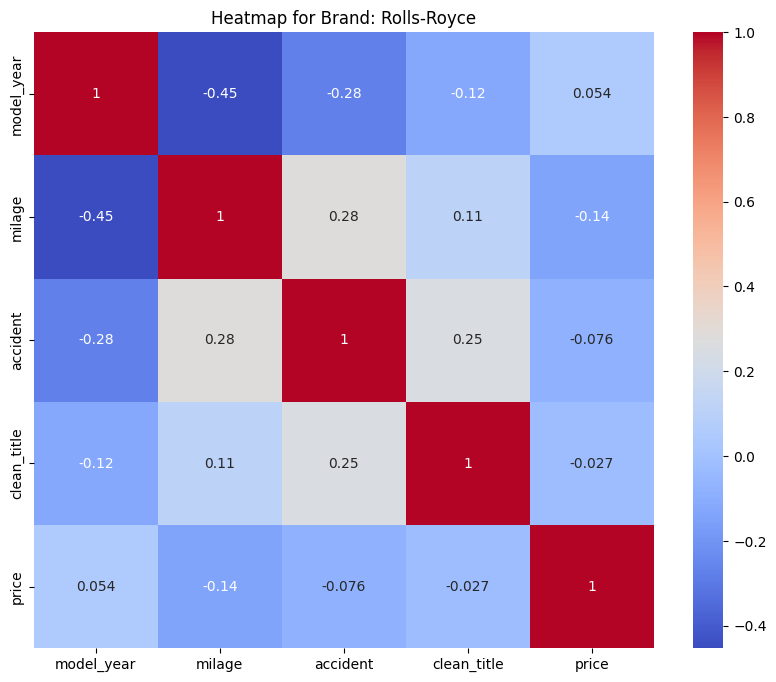

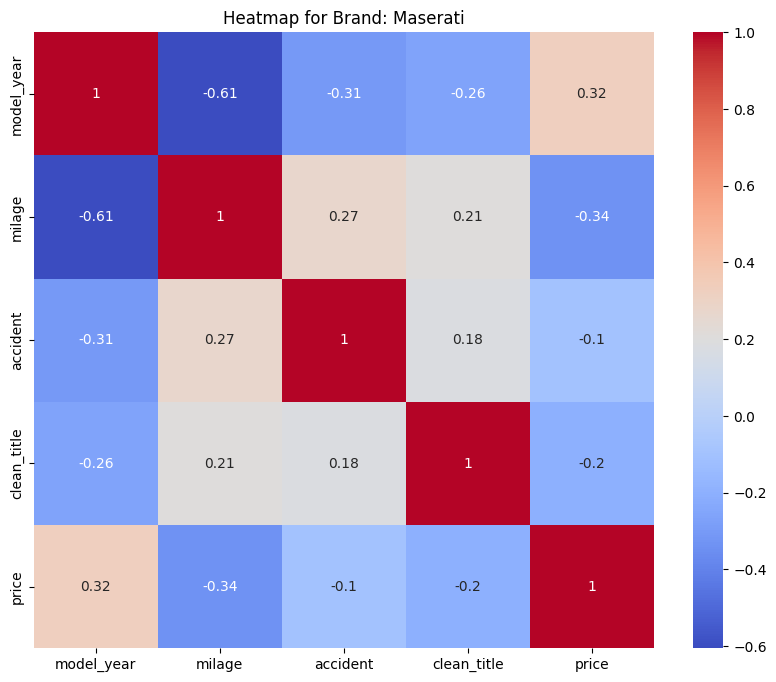

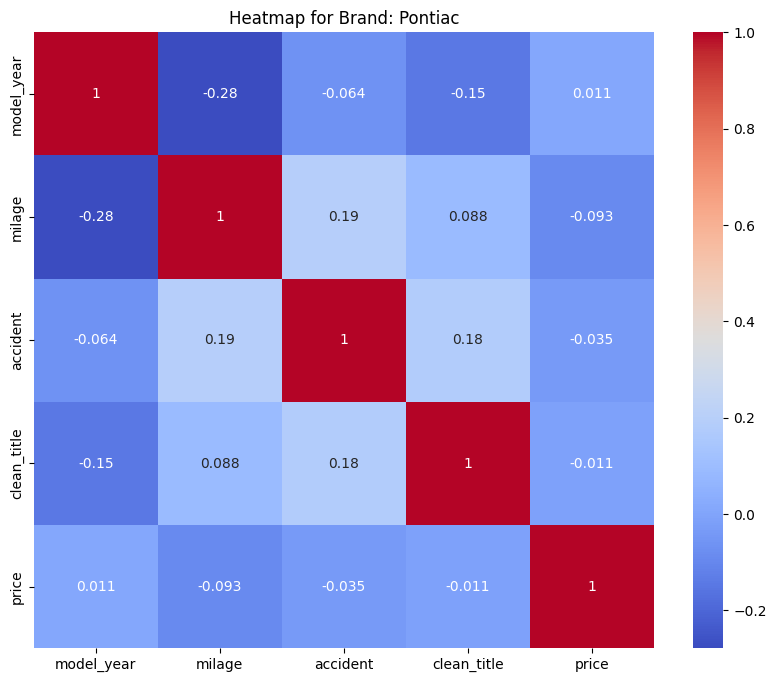

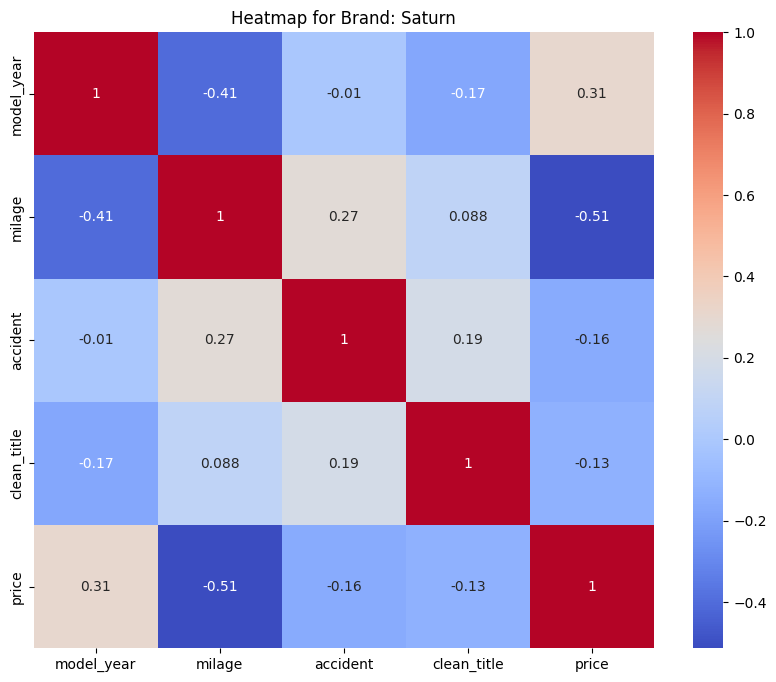

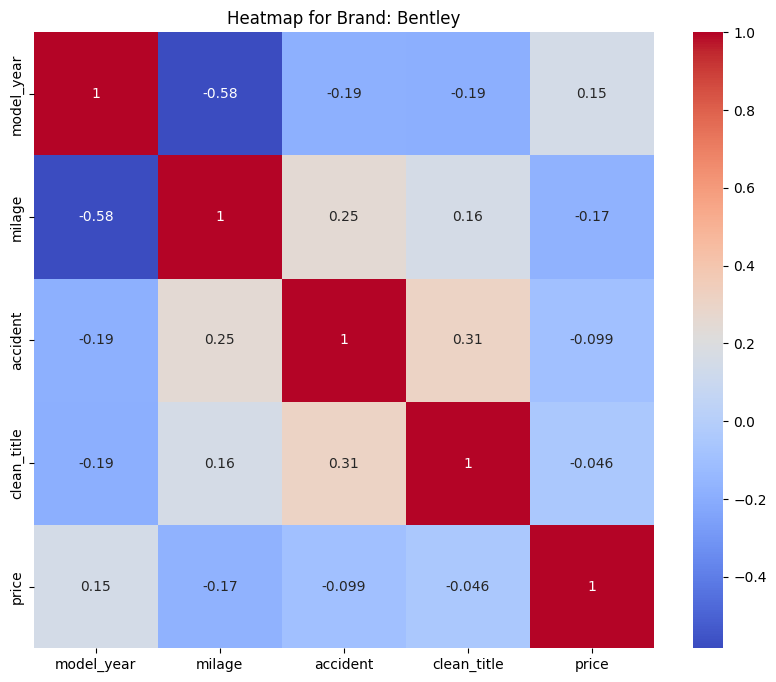

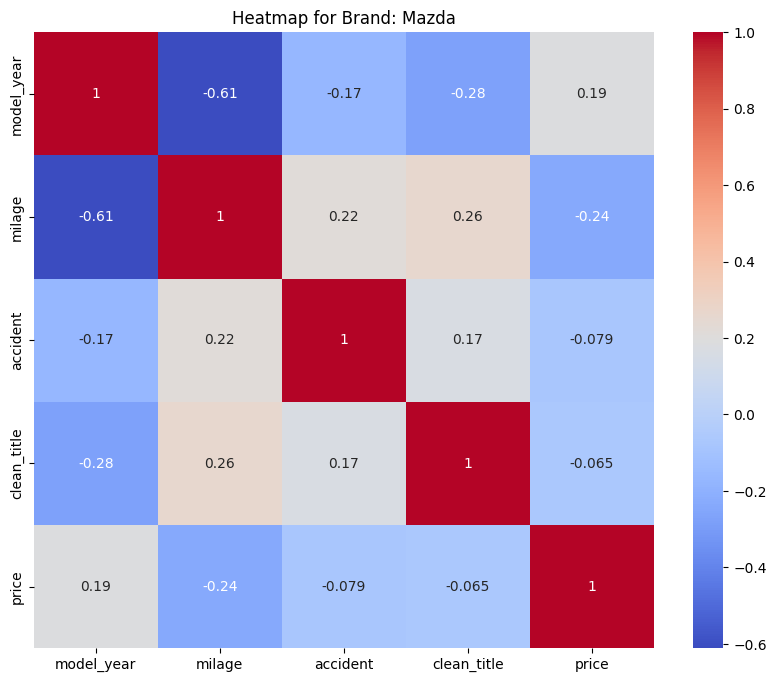

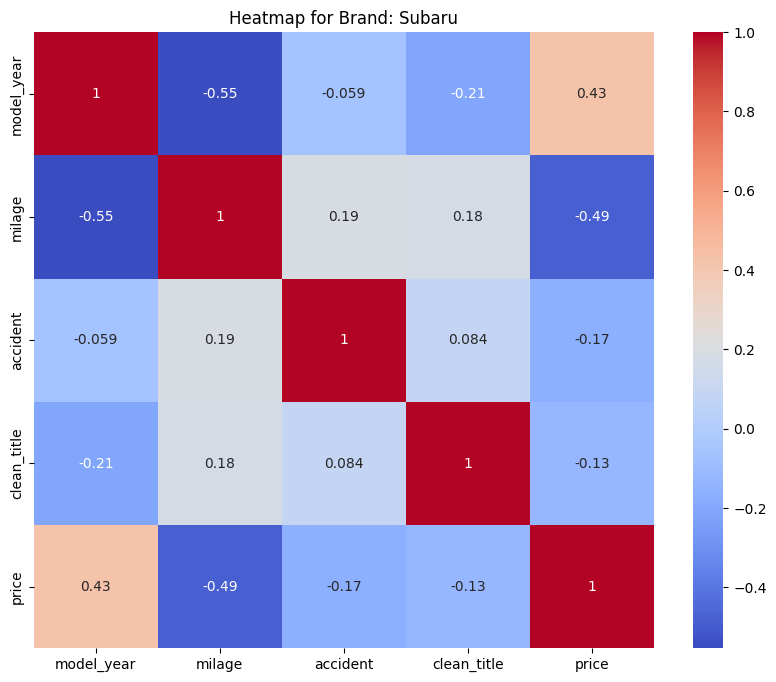

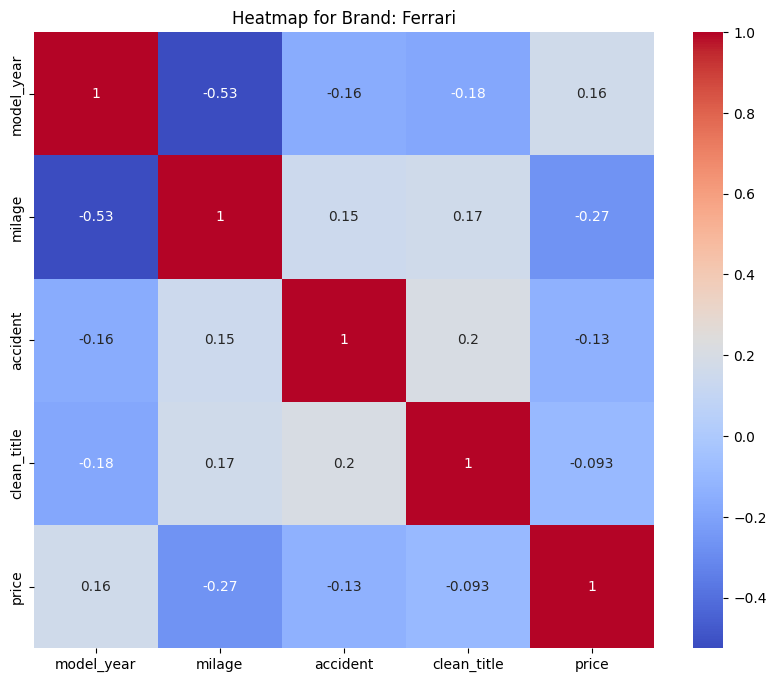

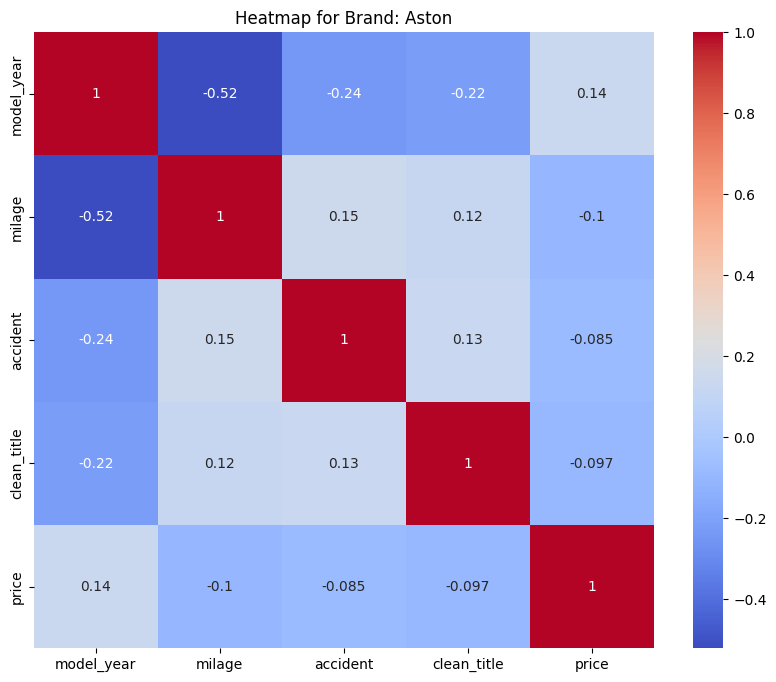

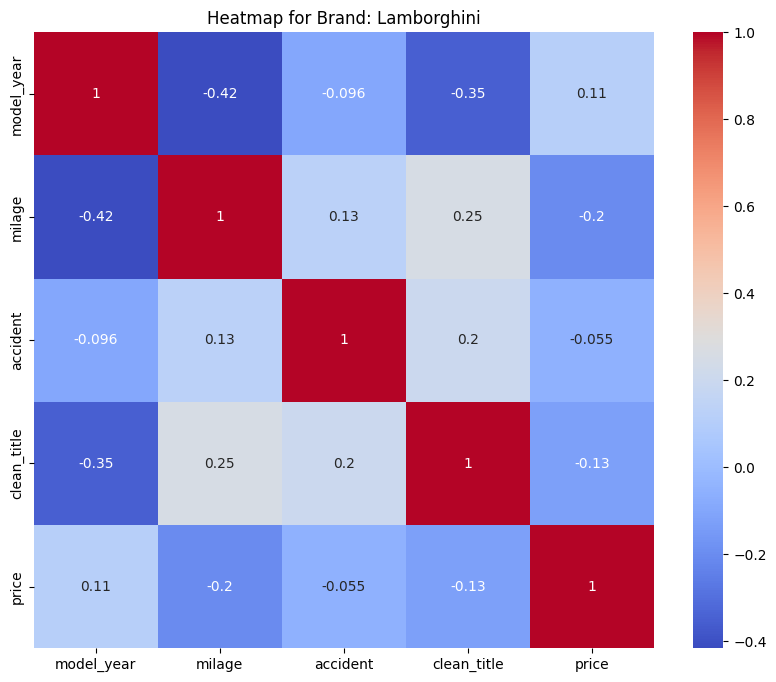

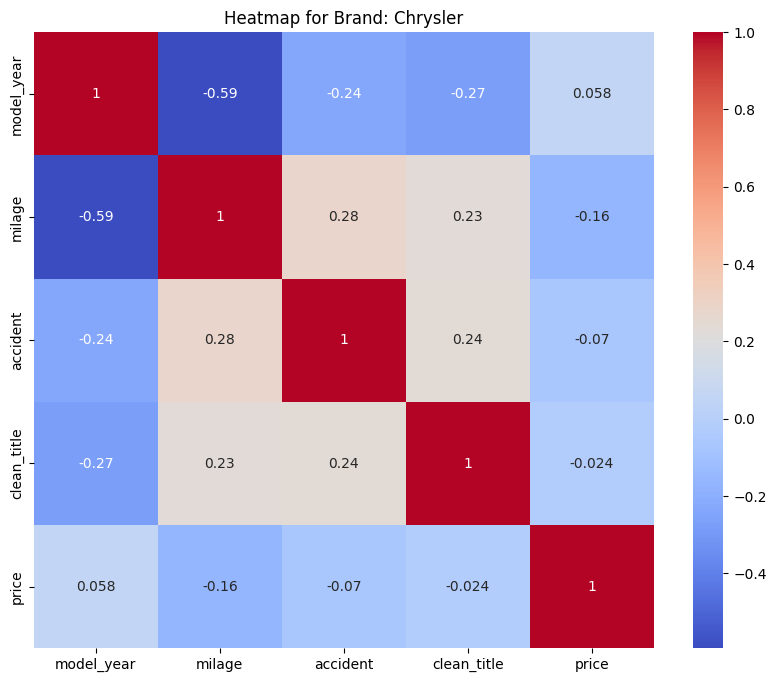

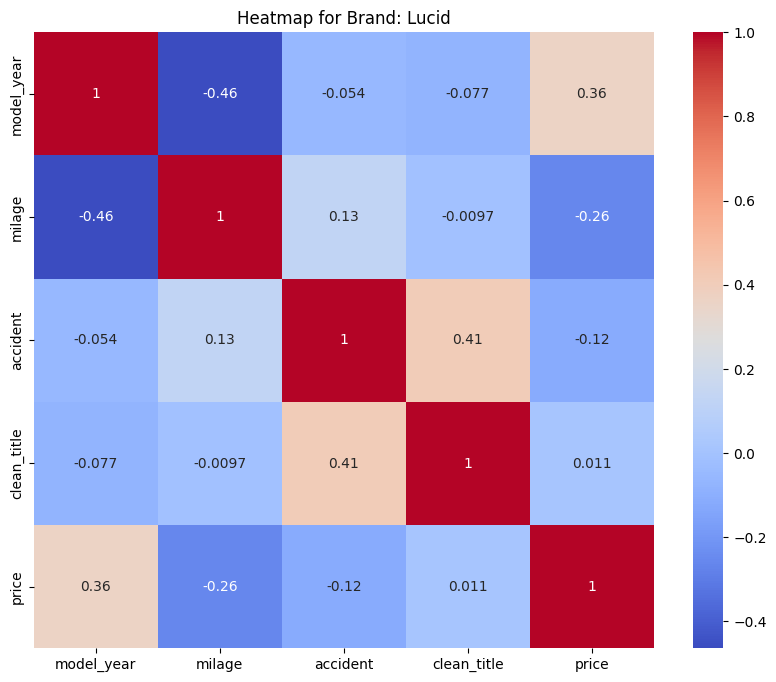

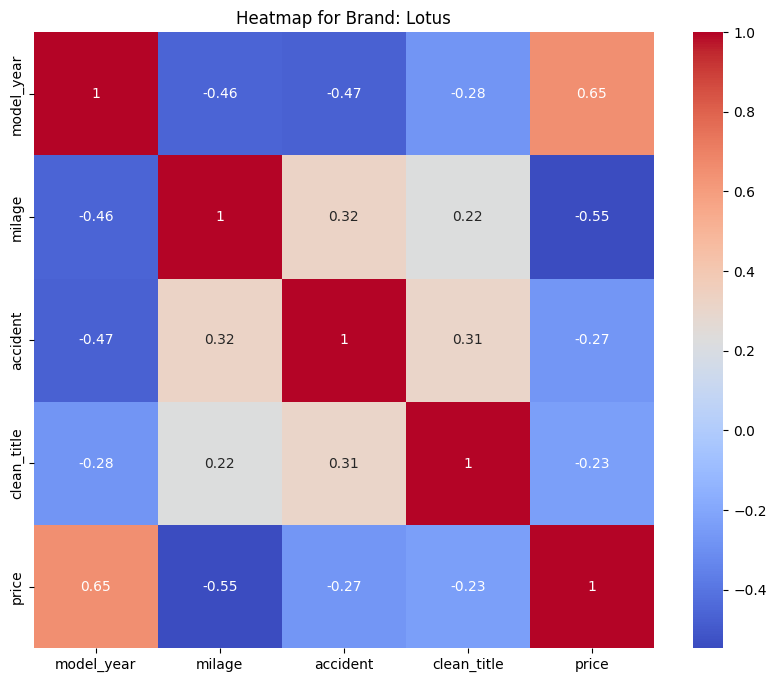

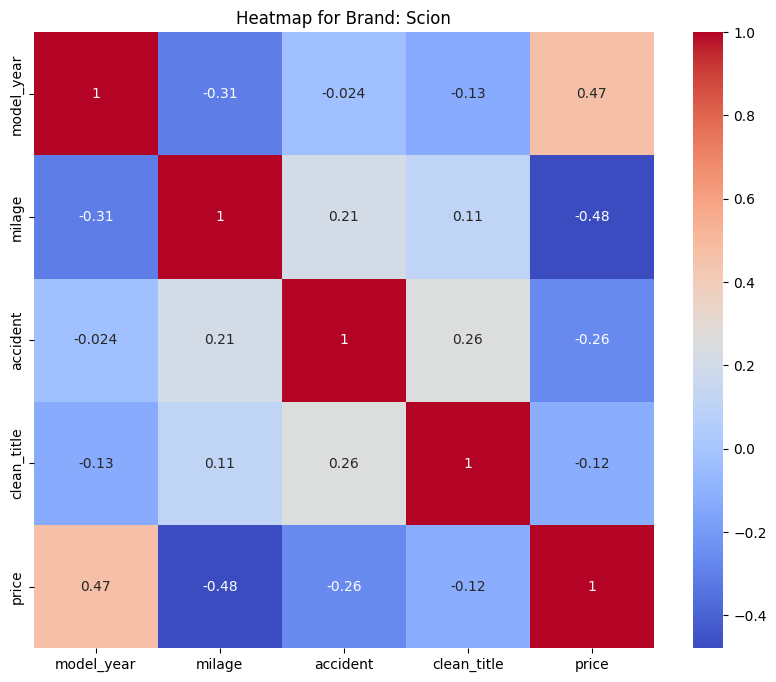

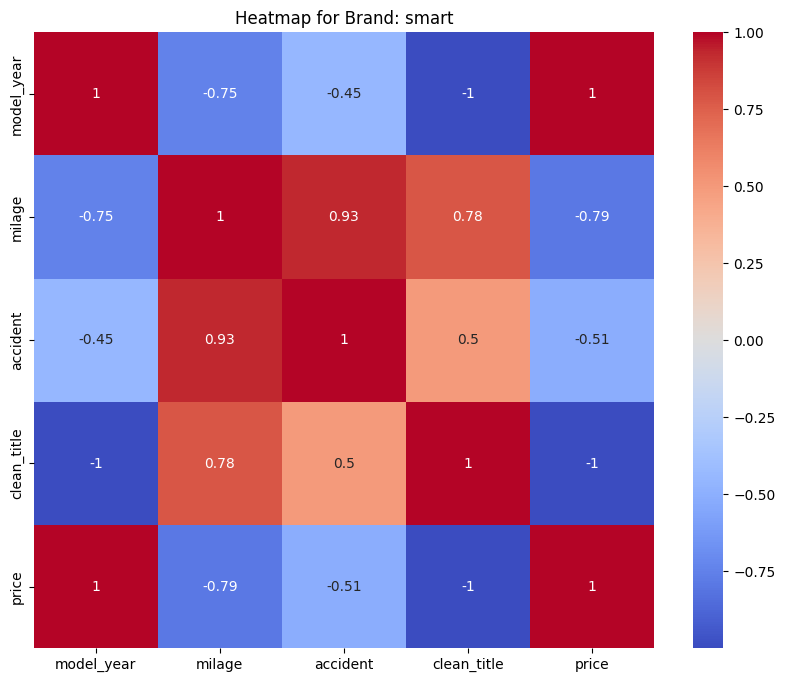

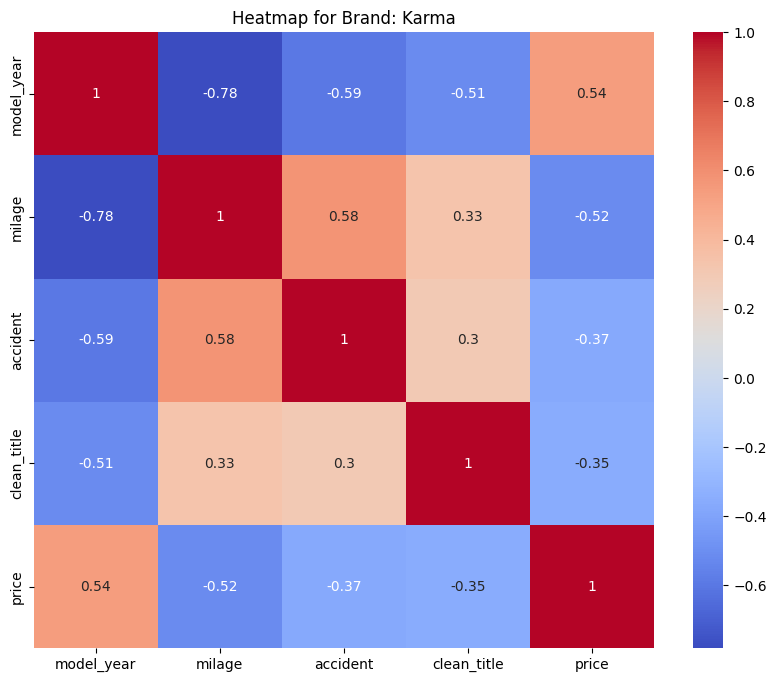

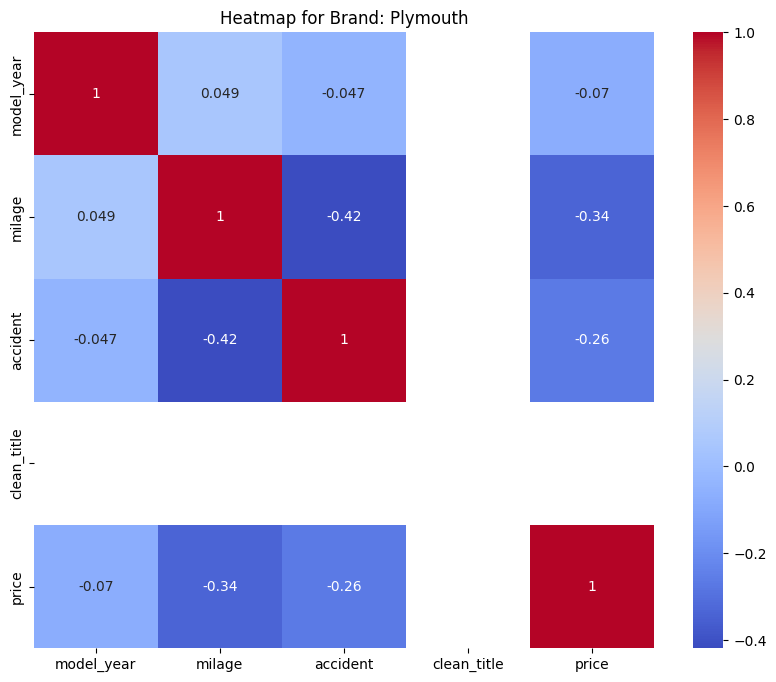

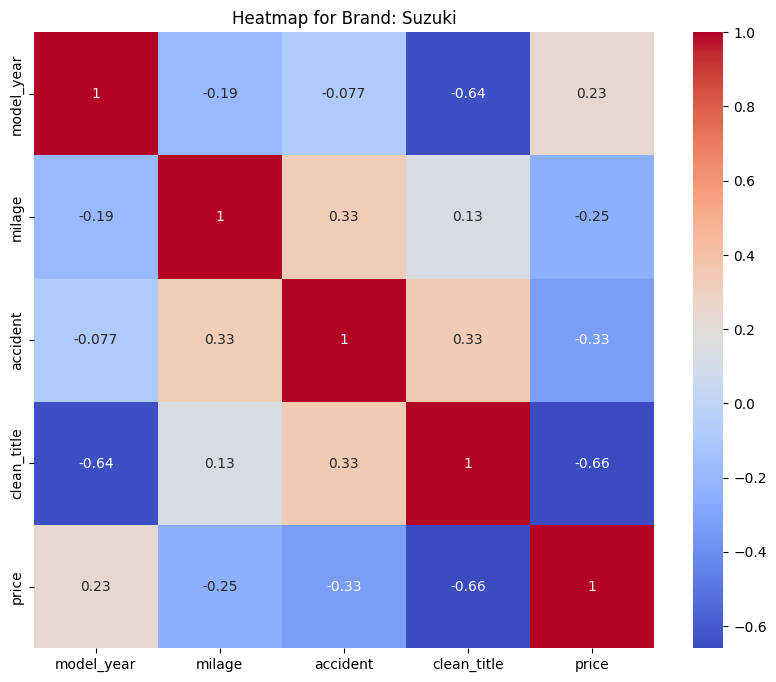

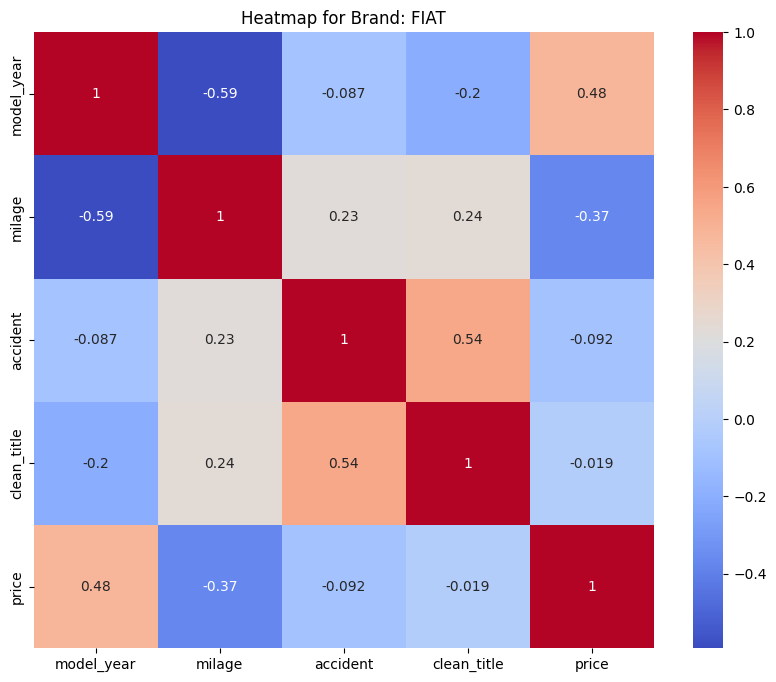

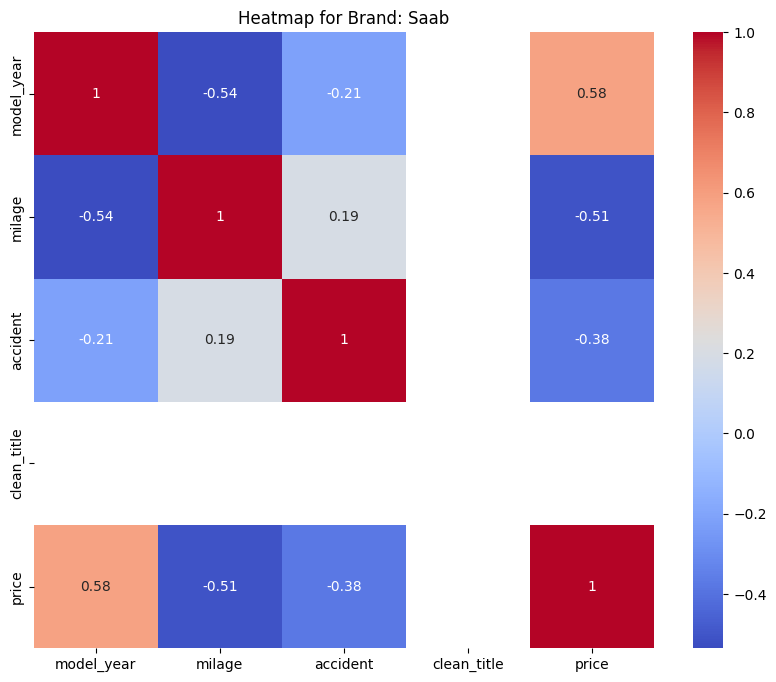

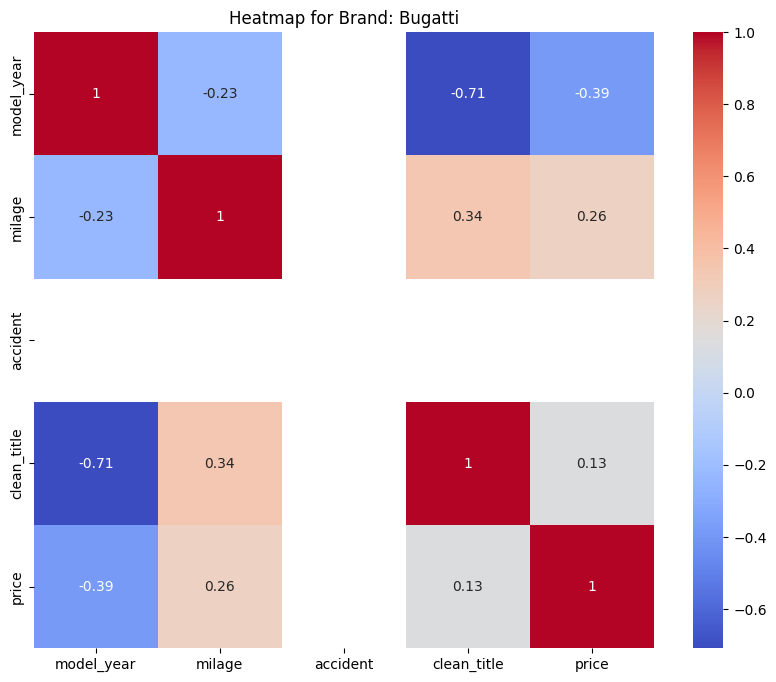

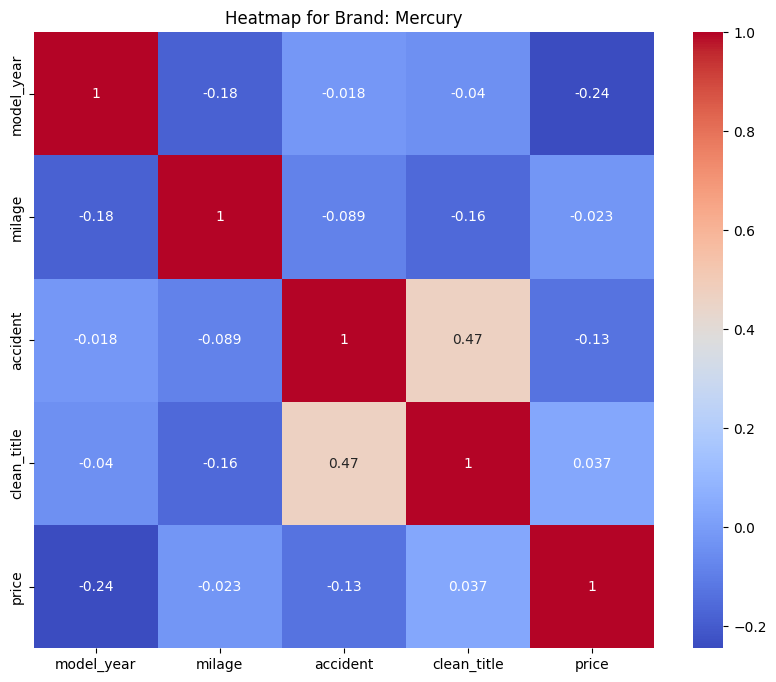

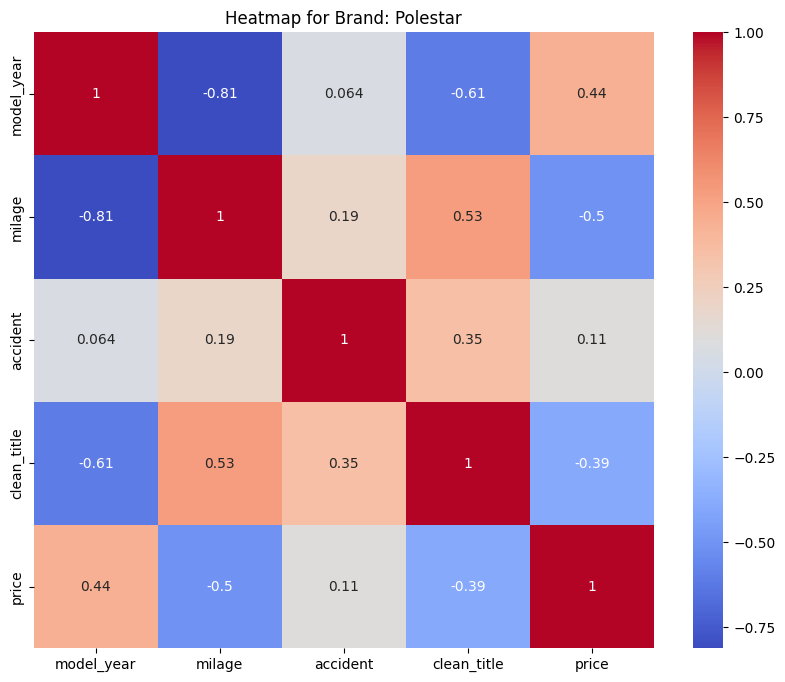

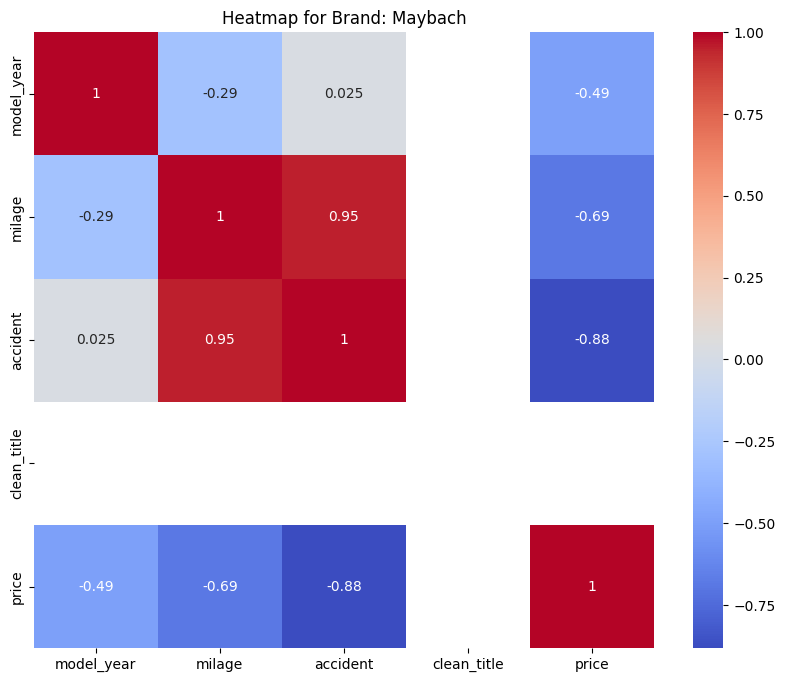

In [32]:
df = df.drop(['model','fuel_type','engine', 'transmission', 'ext_col', 'int_col', 'id',"PriceGroup"], axis=1)

brands= df['brand'].unique()

df_brand_list= []
filtered_corr= []

for brand in brands:
    
    df_brand_list.append(df[df['brand'] == brand])

for df_brand in df_brand_list:
    brand_nome = df_brand['brand'].iloc[0]
    df_brand.drop('brand', axis=1, inplace=True)
    
    corr_matrix = df_brand.corr()  
    filtered = corr_matrix.where(((corr_matrix > 0.3) | (corr_matrix < -0.3))& (corr_matrix != 1)).stack()
    filtered_corr.append((f'Brand name: {brand_nome}\n',filtered))
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Heatmap for Brand: {brand_nome}')
    
    #esportarle in png 

    plt.savefig(f'./image/{brand_nome}_heatmap.png',  bbox_inches='tight')
    
display(filtered_corr)

    
    


    
    
    

    
    
    
    